# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [8]:
from random import randint,choice, choices, random, sample
from dataclasses import dataclass

from copy import copy

import lab9_lib
from collections import defaultdict

import matplotlib.pyplot as plt

In [9]:
fitness = lab9_lib.make_problem(10)
for n in range(10):
    ind = choices([0, 1], k=50)
    print(f"{''.join(str(g) for g in ind)}: {fitness(ind):.2%}")

print(fitness.calls)

10110010101000010110011001001000100001011101101010: 7.34%
00100100100001000000001101000100111011101010101100: 7.36%
01111001101011101101010000001101110101000110001011: 15.33%
01001010100010001101000110110001010011010111011101: 9.13%
11100110110001111110111111100010001100010011010001: 9.33%
11100000011010010000001001010111001101111001001111: 15.33%
11100000011010101101101100110100110100001111101010: 9.13%
01100111010010010100010000001111100100110000000001: 7.33%
01011111001000010000011110010111000001011000011111: 7.33%
00101001101111100110101011010111100100101011100010: 9.11%
10


EA

10.81%
11.55%
11.55%
11.75%
16.78%
16.78%
16.78%
16.78%
16.78%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
16.80%
16.80%
16.80%
16.80%
16.80%
16.80%
16.81%
16.81%
16.81%
16.82%
16.82%
16.82%
16.82%
16.82%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.83%
16.84%
16.84%
16.84%
16.84%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.87%
16.87%
16.87%
16.87%
16.87%
16.87%
16.88%
16.88%
16.88%
16.88%
16.88%
16.88%
16.88%
16.88%
16.88%
16.88%
16.88%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.89%
16.90%
16.90%
16.90%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.91%
16.92%
16.92%
16.92%
16.92%
16.92%
16.92%
16.92%
16.92%
16.93%
16.93%

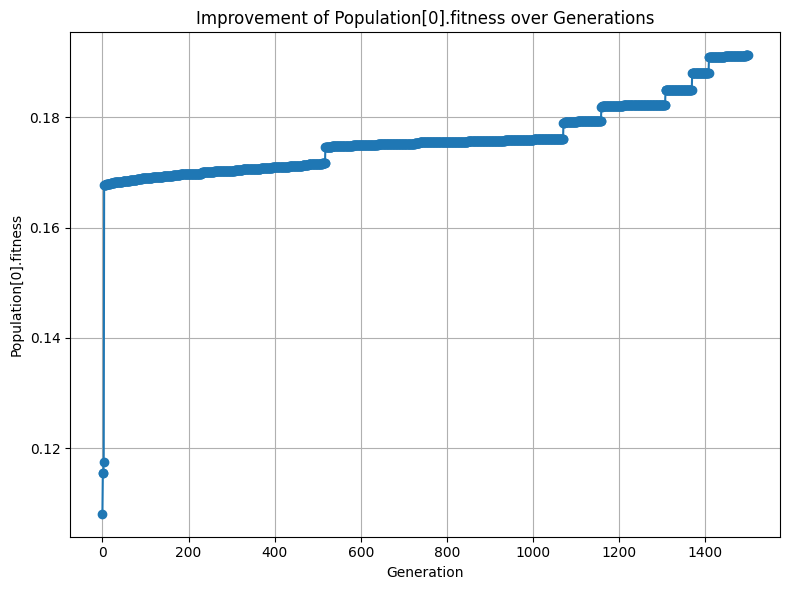

30020


In [17]:
fitness = lab9_lib.make_problem(10)

POPULATION_SIZE = 20
OFFSPRING_SIZE = 20
TOURNAMENT_SIZE = 3
MUTATION_PROBABILITY = 0.2 #0.15?

@dataclass
class Individual:
    fitness: int
    genotype: list[int]

population = [
    Individual(
        genotype=choices([0, 1], k=1000), #k=500?
        fitness=None,
    )
    for _ in range(POPULATION_SIZE)
]

for i in population:
    i.fitness = fitness(i.genotype)

def select_parent(pop):
    pool = [choice(pop) for _ in range(TOURNAMENT_SIZE)]  
    champion = max(pool, key=lambda i: i.fitness)
    return champion

def mutate(ind: Individual) -> Individual:
    offspring = copy(ind)
    pos = randint(0, len(offspring.genotype)-1) 
    offspring.genotype[pos] = not offspring.genotype[pos]
    offspring.fitness = None
    return offspring


def one_cut_xover(ind1: Individual, ind2: Individual) -> Individual:
    cut_point = randint(0, len(ind1.genotype)) 
    offspring = Individual(fitness=None,
                           genotype=ind1.genotype[:cut_point] + ind2.genotype[cut_point:])
    return offspring

fitness_values = []
generations = []

for generation in range(1_500): #10_000 first
    offspring = list() 
    for counter in range(OFFSPRING_SIZE):
        if random() < MUTATION_PROBABILITY:
            p = select_parent(population)
            o = mutate(p)
        else:
            p1 = select_parent(population)
            p2 = select_parent(population)
            o = one_cut_xover(p1, p2)
        offspring.append(o) 

    for i in offspring:
        i.fitness = fitness(i.genotype)
    population.extend(offspring) 
    population.sort(key=lambda i: i.fitness, reverse=True) 
    population = population[:POPULATION_SIZE]

    # Append fitness value and generation number to the lists
    fitness_values.append(population[0].fitness)
    generations.append(generation)

    #print(population[0].fitness)
    print(f"{population[0].fitness:.2%}")


# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(generations, fitness_values, marker='o', linestyle='-')
plt.title('Improvement of Population[0].fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Population[0].fitness')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

print(fitness.calls)
#reset to 0
fitness._calls = 0


EA with diversity encouraging through parent selection

This  method calculates the average dissimilarity of each individual in the tournament against all other individuals in the population. It then selects the parent with the lowest average dissimilarity as a measure of high diversity for reproduction

10.79%
10.79%
11.16%
11.16%
11.16%
11.16%
11.16%
11.17%
16.78%
16.78%
16.78%
16.78%
16.78%
16.78%
16.78%
16.78%
16.78%
16.78%
16.78%
16.78%
16.80%
16.80%
16.80%
16.80%
16.80%
16.80%
16.80%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.81%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.82%
16.83%
16.83%
16.83%
16.83%
16.84%
16.84%
16.84%
16.84%
16.84%
16.84%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.85%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%
16.86%

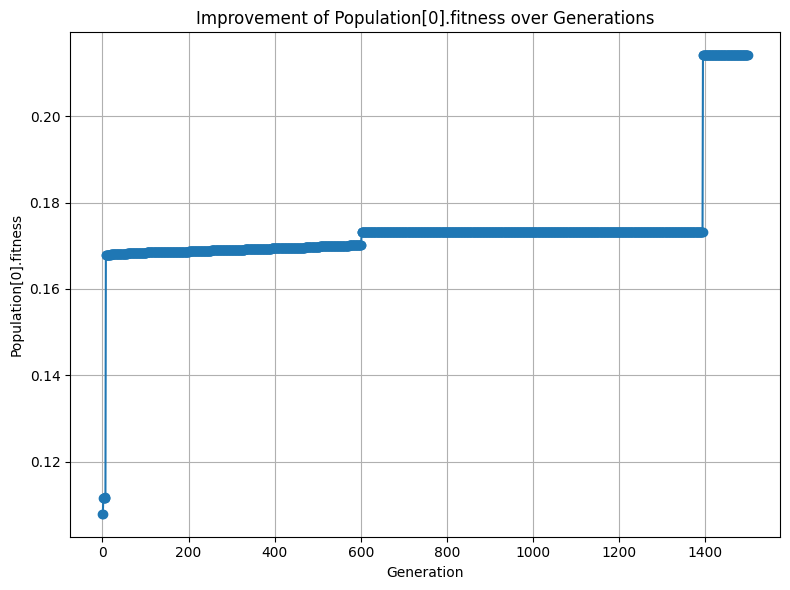

30020


In [11]:
fitness = lab9_lib.make_problem(10)

POPULATION_SIZE = 20
OFFSPRING_SIZE = 20
TOURNAMENT_SIZE = 3
MUTATION_PROBABILITY = 0.2 #0.15?

@dataclass
class Individual:
    fitness: int
    genotype: list[int]

population = [
    Individual(
        genotype=choices([0, 1], k=1000), #k=500?
        fitness=None,
    )
    for _ in range(POPULATION_SIZE)
]

for i in population:
    i.fitness = fitness(i.genotype)


# Function to calculate average dissimilarity
def calculate_average_dissimilarity(individual, population):
    total_dissimilarity = 0
    for other_individual in population:
        # Calculate dissimilarity by comparing the difference in genotypes
        total_dissimilarity += sum(1 for gene1, gene2 in zip(individual.genotype, other_individual.genotype) if gene1 != gene2)
    # Calculate the average dissimilarity
    return total_dissimilarity / len(population)

# Function for parent selection based on average dissimilarity
def select_parent_with_average_dissimilarity(population):
    tournament_pool = [choice(population) for _ in range(TOURNAMENT_SIZE)]
    
    # Calculate average dissimilarity for each individual in the tournament
    dissimilarity_scores = {id(ind): calculate_average_dissimilarity(ind, population) for ind in tournament_pool}
    
    # Choose the parent with the lowest average dissimilarity
    parent_id = min(dissimilarity_scores, key=dissimilarity_scores.get)
    parent = next(ind for ind in tournament_pool if id(ind) == parent_id)
    return parent







def mutate(ind: Individual) -> Individual:
    offspring = copy(ind)
    pos = randint(0, len(offspring.genotype)-1) 
    offspring.genotype[pos] = not offspring.genotype[pos]
    offspring.fitness = None
    return offspring


def one_cut_xover(ind1: Individual, ind2: Individual) -> Individual:
    cut_point = randint(0, len(ind1.genotype)) 
    offspring = Individual(fitness=None,
                           genotype=ind1.genotype[:cut_point] + ind2.genotype[cut_point:])
    return offspring


fitness_values = []
generations = []


for generation in range(1_500): #10_000 1_500
    offspring = list() 
    for counter in range(OFFSPRING_SIZE):
        if random() < MUTATION_PROBABILITY:
            p = select_parent(population)
            o = mutate(p)
        else:
            p1 = select_parent_with_average_dissimilarity(population)
            p2 = select_parent_with_average_dissimilarity(population)
            o = one_cut_xover(p1, p2)
        offspring.append(o) 

    for i in offspring:
        i.fitness = fitness(i.genotype)
    population.extend(offspring) 
    population.sort(key=lambda i: i.fitness, reverse=True) 
    population = population[:POPULATION_SIZE]

 # Append fitness value and generation number to the lists
    fitness_values.append(population[0].fitness)
    generations.append(generation)

    #print(population[0].fitness)
    print(f"{population[0].fitness:.2%}")


# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(generations, fitness_values, marker='o', linestyle='-')
plt.title('Improvement of Population[0].fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Population[0].fitness')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

print(fitness.calls)
#reset to 0
fitness._calls = 0

EA with Adaptation

The adaptation mechanism aims to address scenarios where fitness improvement stagnates by increasing the mutation probability. This adjustment introduces more genetic diversity into the population, potentially helping the algorithm explore new areas of the search space that might contain better solutions.


In this example, the adapt_mutation_probability function adjusts the mutation probability based on the change in the best fitness value over generations. If the fitness improvement stagnates (less than or equal to a 0.5% increase over 50 generations), it increases the mutation probability by a fixed increment (MUTATION_INCREMENT)

15.90%
15.90%
15.90%
15.90%
15.90%
15.90%
15.90%
15.90%
15.90%
15.90%
15.90%
15.90%
16.81%
16.81%
16.81%
16.81%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
21.02%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%
22.60%

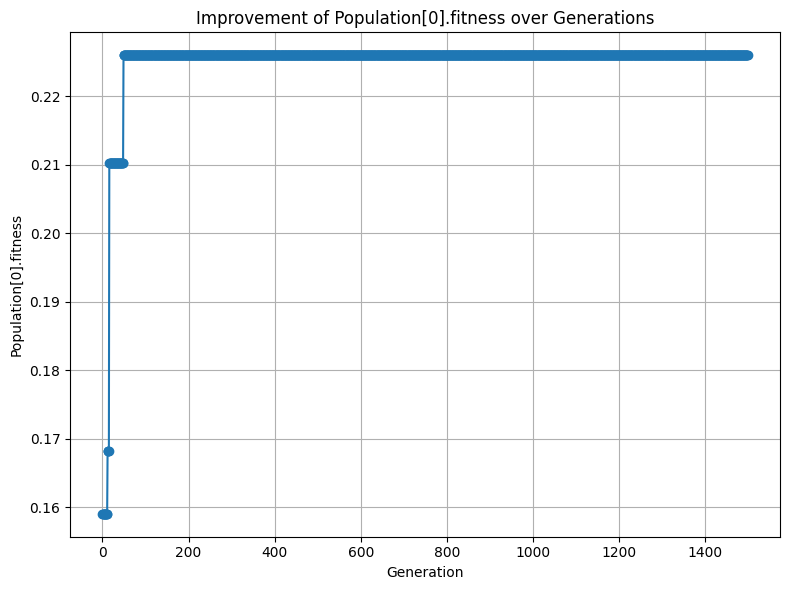

30020


In [14]:
fitness = lab9_lib.make_problem(10)

POPULATION_SIZE = 20
OFFSPRING_SIZE = 20
TOURNAMENT_SIZE = 3
INITIAL_MUTATION_PROBABILITY = 0.2  # Initial mutation probability
MUTATION_INCREMENT = 0.05  # Amount to increase mutation probability

@dataclass
class Individual:
    fitness: int
    genotype: list[int]

population = [
    Individual(
        genotype=choices([0, 1], k=1000), #k=500?
        fitness=None,
    )
    for _ in range(POPULATION_SIZE)
]

for i in population:
    i.fitness = fitness(i.genotype)

def select_parent(pop):
    pool = [choice(pop) for _ in range(TOURNAMENT_SIZE)]
    champion = max(pool, key=lambda i: i.fitness)
    return champion

def mutate(ind: Individual, mutation_prob: float) -> Individual:
    offspring = copy(ind)
    for i in range(len(offspring.genotype)):
        if random() < mutation_prob:
            offspring.genotype[i] = not offspring.genotype[i]
    offspring.fitness = None
    return offspring

def one_cut_xover(ind1: Individual, ind2: Individual) -> Individual:
    cut_point = randint(0, len(ind1.genotype))
    offspring = Individual(
        fitness=None,
        genotype=ind1.genotype[:cut_point] + ind2.genotype[cut_point:]
    )
    return offspring

def adapt_mutation_probability(generations_passed, best_fitness, previous_best_fitness, mutation_prob):
    # Check if fitness has improved by at least 1% in the last 20 generations
    if generations_passed >= 50 and (best_fitness - previous_best_fitness) / previous_best_fitness <= 0.005:  #change to 50 and 0.005 
        mutation_prob += MUTATION_INCREMENT  # Increase mutation probability by a fixed increment
    return mutation_prob

# Initialize variables for adaptation
previous_best_fitness = population[0].fitness
mutation_probability = INITIAL_MUTATION_PROBABILITY

fitness_values = []
generations = []

for generation in range(1_500): #10_000 1_500
    offspring = list()
    for counter in range(OFFSPRING_SIZE):
        if random() < mutation_probability:
            p = select_parent(population)
            o = mutate(p, mutation_probability)
        else:
            p1 = select_parent(population)
            p2 = select_parent(population)
            o = one_cut_xover(p1, p2)
        offspring.append(o)

    # Calculate fitness for offspring
    for i in offspring:
        i.fitness = fitness(i.genotype)

    # Sort population by fitness and select the top individuals
    population.extend(offspring)
    population.sort(key=lambda i: i.fitness, reverse=True)
    population = population[:POPULATION_SIZE]

   


    current_best_fitness = population[0].fitness
    mutation_probability = adapt_mutation_probability(generation, current_best_fitness, previous_best_fitness, mutation_probability)

    # Update previous best fitness
    previous_best_fitness = current_best_fitness

 # Append fitness value and generation number to the lists
    fitness_values.append(population[0].fitness)
    generations.append(generation)
    
    print(f"{population[0].fitness:.2%}")
# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(generations, fitness_values, marker='o', linestyle='-')
plt.title('Improvement of Population[0].fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Population[0].fitness')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

print(fitness.calls)
#reset to 0
fitness._calls = 0

EA with diversity encouraging through BOTH parent selection and adaptation

16.20%
16.20%
16.20%
16.20%
16.20%
16.20%
16.20%
16.20%
16.21%
16.21%
16.21%
16.21%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
16.79%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.03%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%
21.80%

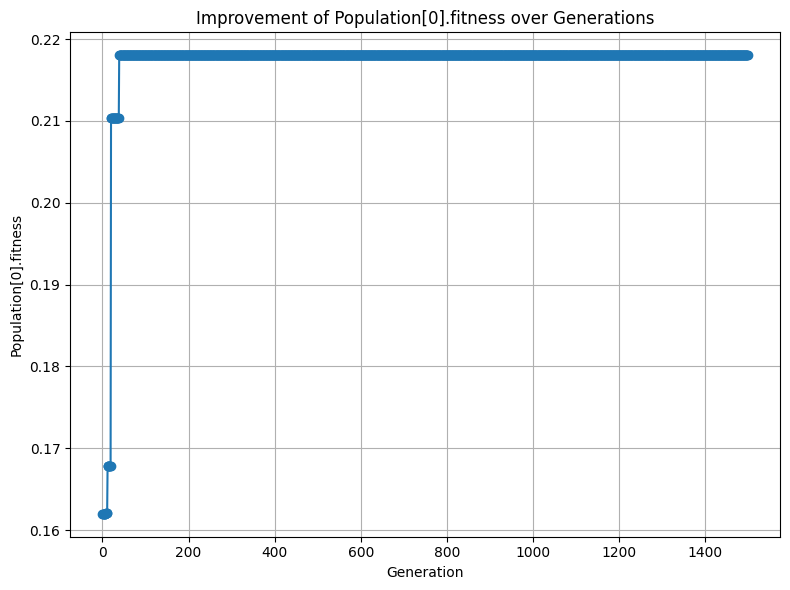

30020


In [13]:
from dataclasses import dataclass
from random import randint, choice, random
from copy import copy
import lab9_lib

# Define fitness function
fitness = lab9_lib.make_problem(10)

# Define EA parameters
POPULATION_SIZE = 20
OFFSPRING_SIZE = 20
TOURNAMENT_SIZE = 3
INITIAL_MUTATION_PROBABILITY = 0.2  # Initial mutation probability
MUTATION_INCREMENT = 0.05  # Amount to increase mutation probability

# Define individual data structure
@dataclass
class Individual:
    fitness: int
    genotype: list[int]

# Initialize population with random genotypes and calculate fitness
population = [
    Individual(
        genotype=choices([0, 1], k=1000),
        fitness=None,
    )
    for _ in range(POPULATION_SIZE)
]

for i in population:
    i.fitness = fitness(i.genotype)

# Function to calculate average dissimilarity
def calculate_average_dissimilarity(individual, population):
    total_dissimilarity = 0
    for other_individual in population:
        total_dissimilarity += sum(1 for gene1, gene2 in zip(individual.genotype, other_individual.genotype) if gene1 != gene2)
    return total_dissimilarity / len(population)

# Function for parent selection based on average dissimilarity
def select_parent_with_average_dissimilarity(population):
    tournament_pool = [choice(population) for _ in range(TOURNAMENT_SIZE)]
    dissimilarity_scores = {id(ind): calculate_average_dissimilarity(ind, population) for ind in tournament_pool}
    parent_id = min(dissimilarity_scores, key=dissimilarity_scores.get)
    parent = next(ind for ind in tournament_pool if id(ind) == parent_id)
    return parent

# Mutation function
def mutate(ind: Individual, mutation_prob: float) -> Individual:
    offspring = copy(ind)
    for i in range(len(offspring.genotype)):
        if random() < mutation_prob:
            offspring.genotype[i] = not offspring.genotype[i]
    offspring.fitness = None
    return offspring

# Crossover function
def one_cut_xover(ind1: Individual, ind2: Individual) -> Individual:
    cut_point = randint(0, len(ind1.genotype))
    offspring = Individual(
        fitness=None,
        genotype=ind1.genotype[:cut_point] + ind2.genotype[cut_point:]
    )
    return offspring

# Function to adapt mutation probability based on fitness improvement
def adapt_mutation_probability(generations_passed, best_fitness, previous_best_fitness, mutation_prob):
    if generations_passed >= 50 and (best_fitness - previous_best_fitness) / previous_best_fitness <= 0.005:
        mutation_prob += MUTATION_INCREMENT  # Increase mutation probability by a fixed increment
    return mutation_prob

# Initialize variables for adaptation
previous_best_fitness = population[0].fitness
mutation_probability = INITIAL_MUTATION_PROBABILITY

fitness_values = []
generations = []

for generation in range(1_500): #10_000 1_500
    offspring = list() 
    for counter in range(OFFSPRING_SIZE):
        if random() < mutation_probability:
            p = choice(population)  # Using simple parent selection for mutation
            o = mutate(p, mutation_probability)
        else:
            p1 = select_parent_with_average_dissimilarity(population)
            p2 = select_parent_with_average_dissimilarity(population)
            o = one_cut_xover(p1, p2)
        offspring.append(o) 

    # Calculate fitness for offspring
    for i in offspring:
        i.fitness = fitness(i.genotype)

    # Merge offspring with the current population and select top individuals
    population.extend(offspring) 
    population.sort(key=lambda i: i.fitness, reverse=True) 
    population = population[:POPULATION_SIZE]

    # Adapt mutation probability based on fitness improvement
    current_best_fitness = population[0].fitness
    mutation_probability = adapt_mutation_probability(generation, current_best_fitness, previous_best_fitness, mutation_probability)
    previous_best_fitness = current_best_fitness  # Update previous best fitness for adaptation


     # Append fitness value and generation number to the lists
    fitness_values.append(population[0].fitness)
    generations.append(generation)
    
    print(f"{population[0].fitness:.2%}")

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(generations, fitness_values, marker='o', linestyle='-')
plt.title('Improvement of Population[0].fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Population[0].fitness')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

print(fitness.calls)
#reset to 0
fitness._calls = 0


Conclusion: Although fitness functions got better, the number of fitness function calls did not decrease.